In [66]:
import os
import sys
import numpy as np
import pandas as pd
from pathlib import Path

In [77]:
df_raw = pd.read_csv('runs.csv')
df = df_raw[['Name', 'F1-Score', 'accuracy', 'sensitivity', 'specificity', 'recall']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         100 non-null    object 
 1   F1-Score     100 non-null    float64
 2   accuracy     100 non-null    float64
 3   sensitivity  100 non-null    float64
 4   specificity  100 non-null    float64
 5   recall       100 non-null    float64
dtypes: float64(5), object(1)
memory usage: 4.8+ KB


In [78]:

#TODO: Fix bug in MDVR_KCL name extraction
def extract_model_and_dataset_name(joint_name):
    joint_name = joint_name.replace("MDVR_KCL", "MDVR")
    model, full_dataset_name = joint_name.split(' - ')
    model = model.split(': ')[-1]
    full_dataset_name = full_dataset_name.split(': ')[-1]
    dataset_parts = full_dataset_name.split('_')
    dataset, method, variant = (dataset_parts[0], 'N/A', 'N/A')
    
    if(len(dataset_parts) == 3):
        dataset, method, variant = dataset_parts
    if(len(dataset_parts) > 3):
        dataset, method, variant = dataset_parts[0], " ".join(dataset_parts[1:-1]), dataset_parts[-1]
    
    return (model, dataset, method, variant)

In [92]:
df[['model_name', 'dataset', 'feature_extraction_method', 'dataset_variant']] = list(map(extract_model_and_dataset_name, df['Name'].values))

df['model_name'] = pd.Categorical(df.model_name)
df['dataset'] = pd.Categorical(df.dataset)
df['feature_extraction_method'] = pd.Categorical(df.feature_extraction_method)
df['dataset_variant'] = pd.Categorical(df.dataset_variant)

df.sample(4)

,Name,F1-Score,accuracy,sensitivity,specificity,recall,model_name,dataset,feature_extraction_method,dataset_variant
95,Model: SVM - Dataset: MDVR_KCL_split_on_silenc...,89.317282,91.122972,88.012336,93.441158,90.853585,SVM,MDVR,split on silence,500ms
12,Model: lightGBM - Dataset: ItalianParkinsonSpe...,99.222635,99.130715,98.987824,99.323462,99.473368,lightGBM,ItalianParkinsonSpeech,chunk,5000ms
1,Model: lightGBM - Dataset: ItalianParkinsonSpe...,99.730431,99.693010,99.635005,99.770299,99.826239,lightGBM,ItalianParkinsonSpeech,chunk,500ms
5,Model: lightGBM - Dataset: ItalianParkinsonSpe...,99.512562,99.441799,99.312532,99.619496,99.714449,lightGBM,ItalianParkinsonSpeech,chunk,1000ms


In [93]:
italian_df = df.query("dataset == 'ItalianParkinsonSpeech'").reset_index(drop=True)
italian_df

,Name,F1-Score,accuracy,sensitivity,specificity,recall,model_name,dataset,feature_extraction_method,dataset_variant
0,Model: lightGBM - Dataset: ItalianParkinsonSpe...,99.753948,99.719621,99.668571,99.787457,99.839966,lightGBM,ItalianParkinsonSpeech,chunk,500ms
1,Model: lightGBM - Dataset: ItalianParkinsonSpe...,99.730431,99.693010,99.635005,99.770299,99.826239,lightGBM,ItalianParkinsonSpeech,chunk,500ms
2,Model: SVM - Dataset: ItalianParkinsonSpeech_c...,99.669254,99.623617,99.638025,99.609604,99.701504,SVM,ItalianParkinsonSpeech,chunk,500ms
3,Model: lightGBM - Dataset: ItalianParkinsonSpe...,99.616296,99.561629,99.484907,99.663908,99.749540,lightGBM,ItalianParkinsonSpeech,chunk,1000ms
4,Model: SVM - Dataset: ItalianParkinsonSpeech_c...,99.597003,99.539990,99.601823,99.457017,99.592482,SVM,ItalianParkinsonSpeech,chunk,500ms
...,...,...,...,...,...,...,...,...,...,...
74,Model: LR - Dataset: ItalianParkinsonSpeech_ch...,92.786953,91.712458,93.021344,89.959752,92.563401,LR,ItalianParkinsonSpeech,chunk,1000ms
75,Model: LR - Dataset: ItalianParkinsonSpeech_ch...,92.631670,91.661486,93.281133,89.594516,92.103007,LR,ItalianParkinsonSpeech,chunk,5000ms
76,Model: LR - Dataset: ItalianParkinsonSpeech_ch...,92.443211,91.405440,93.177542,89.111148,91.766985,LR,ItalianParkinsonSpeech,chunk,5000ms
77,Model: LR - Dataset: ItalianParkinsonSpeech_sp...,91.784409,91.118348,92.776021,89.267410,91.168053,LR,ItalianParkinsonSpeech,split on silence,2000ms


In [94]:
MDVR_df = df.query("dataset != 'ItalianParkinsonSpeech'").reset_index(drop=True)
MDVR_df

,Name,F1-Score,accuracy,sensitivity,specificity,recall,model_name,dataset,feature_extraction_method,dataset_variant
0,Model: SVM - Dataset: MDVR_KCL_split_on_silenc...,91.486411,92.885606,92.038634,93.503130,91.238792,SVM,MDVR,split on silence,1000ms
1,Model: KNN - Dataset: MDVR_KCL_split_on_silenc...,90.638858,92.224484,90.526440,93.580852,91.038413,KNN,MDVR,split on silence,1000ms
2,Model: KNN - Dataset: MDVR_KCL_chunk_3000ms,89.619411,92.160738,85.680536,96.440564,94.149931,KNN,MDVR,chunk,3000ms
3,Model: SVM - Dataset: MDVR_KCL_chunk_3000ms,89.644640,92.078393,87.093068,95.406430,92.510219,SVM,MDVR,chunk,3000ms
4,Model: SVM - Dataset: MDVR_KCL_chunk_5000ms,89.714902,91.964286,89.693696,93.531964,89.991948,SVM,MDVR,chunk,5000ms
5,Model: lightGBM - Dataset: MDVR_KCL_chunk_5000ms,89.513826,91.905505,87.307566,95.010868,92.172396,lightGBM,MDVR,chunk,5000ms
6,Model: SVM - Dataset: MDVR_KCL_chunk_5000ms,89.755080,91.902927,89.704907,93.385698,89.924936,SVM,MDVR,chunk,5000ms
7,Model: lightGBM - Dataset: MDVR_KCL_split_on_s...,89.989038,91.860034,86.928394,95.508980,93.534359,lightGBM,MDVR,split on silence,500ms
8,Model: KNN - Dataset: MDVR_KCL_chunk_5000ms,89.547846,91.850862,88.932514,93.766150,90.445090,KNN,MDVR,chunk,5000ms
9,Model: SVM - Dataset: MDVR_KCL_chunk_3000ms,89.267535,91.732543,86.739508,95.030263,92.019178,SVM,MDVR,chunk,3000ms


In [96]:
MDVR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Name                       21 non-null     object  
 1   F1-Score                   21 non-null     float64 
 2   accuracy                   21 non-null     float64 
 3   sensitivity                21 non-null     float64 
 4   specificity                21 non-null     float64 
 5   recall                     21 non-null     float64 
 6   model_name                 21 non-null     category
 7   dataset                    21 non-null     category
 8   feature_extraction_method  21 non-null     category
 9   dataset_variant            21 non-null     category
dtypes: category(4), float64(5), object(1)
memory usage: 1.8+ KB


In [97]:
from pandas_profiling import ProfileReport

MDVR_profile = ProfileReport(MDVR_df, title="Pandas Profiling Report for MDVR")
IPS_profile = ProfileReport(MDVR_df, title="Pandas Profiling Report for ItalianParkinsonSpeech")

In [98]:
MDVR_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [90]:
MDVR_profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Plots

In [129]:
def plot_bars(data, x_label, y_label):

    bars = (
        alt.Chart(data)
        .mark_bar()
        .encode(
            alt.X(x_label, sort=None),
            alt.Y(y_label, sort=None),
            tooltip=['accuracy', 'model_name'],
            color=y_label,
        )
    )
    plot_title = f"Plot of {y_label} against {x_label}"
    return bars.properties(title=plot_title)

In [132]:
MDVR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 68 to 99
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       21 non-null     object 
 1   F1-Score                   21 non-null     float64
 2   accuracy                   21 non-null     float64
 3   recall                     21 non-null     float64
 4   sensitivity                21 non-null     float64
 5   specificity                21 non-null     float64
 6   recall                     21 non-null     float64
 7   model_name                 21 non-null     object 
 8   dataset                    21 non-null     object 
 9   feature_extraction_method  21 non-null     object 
 10  dataset_variant            21 non-null     object 
dtypes: float64(6), object(5)
memory usage: 2.0+ KB


In [137]:
# plot_bars(MDVR_df, 'Name', 'accuracy')

In [139]:
import plotly.express as px

df_on_accuracy = MDVR_df.sort_values(by=['accuracy'])

# fig = px.bar(df_on_accuracy, title="All Results", x='Name', y='accuracy', color='model_name', height=800)

# fig.update_layout(
#     xaxis = dict(
#         tickmode = 'array',
#         tickvals = np.arange(100),
#         ticktext = np.arange(100)
#     )
# )

# fig.show()

In [106]:
HTML(italian_df.to_html())

,Name,F1-Score,accuracy,sensitivity,specificity,recall,model_name,dataset,feature_extraction_method,dataset_variant
0,Model: lightGBM - Dataset: ItalianParkinsonSpeech_chunk_500ms,99.753948,99.719621,99.668571,99.787457,99.839966,lightGBM,ItalianParkinsonSpeech,chunk,500ms
1,Model: lightGBM - Dataset: ItalianParkinsonSpeech_chunk_500ms,99.730431,99.693010,99.635005,99.770299,99.826239,lightGBM,ItalianParkinsonSpeech,chunk,500ms
2,Model: SVM - Dataset: ItalianParkinsonSpeech_chunk_500ms,99.669254,99.623617,99.638025,99.609604,99.701504,SVM,ItalianParkinsonSpeech,chunk,500ms
3,Model: lightGBM - Dataset: ItalianParkinsonSpeech_chunk_1000ms,99.616296,99.561629,99.484907,99.663908,99.749540,lightGBM,ItalianParkinsonSpeech,chunk,1000ms
4,Model: SVM - Dataset: ItalianParkinsonSpeech_chunk_500ms,99.597003,99.539990,99.601823,99.457017,99.592482,SVM,ItalianParkinsonSpeech,chunk,500ms
5,Model: lightGBM - Dataset: ItalianParkinsonSpeech_chunk_1000ms,99.512562,99.441799,99.312532,99.619496,99.714449,lightGBM,ItalianParkinsonSpeech,chunk,1000ms
6,Model: KNN - Dataset: ItalianParkinsonSpeech_chunk_500ms,99.452699,99.378404,99.233751,99.567902,99.673890,KNN,ItalianParkinsonSpeech,chunk,500ms
7,Model: KNN - Dataset: ItalianParkinsonSpeech_chunk_500ms,99.432503,99.355606,99.173504,99.595254,99.693197,KNN,ItalianParkinsonSpeech,chunk,500ms
8,Model: SVM - Dataset: ItalianParkinsonSpeech_chunk_1000ms,99.425321,99.343347,99.455876,99.192419,99.397315,SVM,ItalianParkinsonSpeech,chunk,1000ms
9,Model: SVM - Dataset: ItalianParkinsonSpeech_split_on_silence_1000ms,99.279369,99.234065,99.082128,99.482973,99.513867,SVM,ItalianParkinsonSpeech,split on silence,1000ms


In [107]:
MDVR_df.sort_values(['feature_extraction_method', 'dataset_variant'], inplace=False)

,Name,F1-Score,accuracy,sensitivity,specificity,recall,model_name,dataset,feature_extraction_method,dataset_variant
2,Model: KNN - Dataset: MDVR_KCL_chunk_3000ms,89.619411,92.160738,85.680536,96.440564,94.149931,KNN,MDVR,chunk,3000ms
3,Model: SVM - Dataset: MDVR_KCL_chunk_3000ms,89.644640,92.078393,87.093068,95.406430,92.510219,SVM,MDVR,chunk,3000ms
9,Model: SVM - Dataset: MDVR_KCL_chunk_3000ms,89.267535,91.732543,86.739508,95.030263,92.019178,SVM,MDVR,chunk,3000ms
11,Model: KNN - Dataset: MDVR_KCL_chunk_3000ms,88.887403,91.655687,84.293894,96.531406,94.088635,KNN,MDVR,chunk,3000ms
17,Model: lightGBM - Dataset: MDVR_KCL_chunk_3000ms,88.267772,91.178085,84.687172,95.458333,92.378802,lightGBM,MDVR,chunk,3000ms
19,Model: lightGBM - Dataset: MDVR_KCL_chunk_3000ms,88.044690,90.920070,84.369931,95.231261,92.113690,lightGBM,MDVR,chunk,3000ms
4,Model: SVM - Dataset: MDVR_KCL_chunk_5000ms,89.714902,91.964286,89.693696,93.531964,89.991948,SVM,MDVR,chunk,5000ms
5,Model: lightGBM - Dataset: MDVR_KCL_chunk_5000ms,89.513826,91.905505,87.307566,95.010868,92.172396,lightGBM,MDVR,chunk,5000ms
6,Model: SVM - Dataset: MDVR_KCL_chunk_5000ms,89.755080,91.902927,89.704907,93.385698,89.924936,SVM,MDVR,chunk,5000ms
8,Model: KNN - Dataset: MDVR_KCL_chunk_5000ms,89.547846,91.850862,88.932514,93.766150,90.445090,KNN,MDVR,chunk,5000ms


In [111]:
HTML(italian_df.sort_values(['feature_extraction_method', 'dataset_variant'], inplace=False).to_html())

,Name,F1-Score,accuracy,sensitivity,specificity,recall,model_name,dataset,feature_extraction_method,dataset_variant
13,Model: SVM - Dataset: ItalianParkinsonSpeech,99.163047,99.064689,99.046841,99.185884,99.325090,SVM,ItalianParkinsonSpeech,N/A,N/A
22,Model: SVM - Dataset: ItalianParkinsonSpeech,98.799445,98.658298,98.634556,98.785547,98.994372,SVM,ItalianParkinsonSpeech,N/A,N/A
36,Model: lightGBM - Dataset: ItalianParkinsonSpeech,97.783501,97.631366,97.435124,97.959914,98.221646,lightGBM,ItalianParkinsonSpeech,N/A,N/A
41,Model: lightGBM - Dataset: ItalianParkinsonSpeech,97.368130,97.098443,97.143071,97.011582,97.637932,lightGBM,ItalianParkinsonSpeech,N/A,N/A
52,Model: KNN - Dataset: ItalianParkinsonSpeech,95.769143,95.424190,94.080647,97.297323,97.695306,KNN,ItalianParkinsonSpeech,N/A,N/A
56,Model: RF - Dataset: ItalianParkinsonSpeech,95.480973,95.064759,96.083031,93.795028,95.059055,RF,ItalianParkinsonSpeech,N/A,N/A
60,Model: RF - Dataset: ItalianParkinsonSpeech,95.098407,94.545276,95.610364,93.269984,94.640564,RF,ItalianParkinsonSpeech,N/A,N/A
62,Model: KNN - Dataset: ItalianParkinsonSpeech,94.396404,93.940586,92.193067,96.347814,96.813038,KNN,ItalianParkinsonSpeech,N/A,N/A
70,Model: LR - Dataset: ItalianParkinsonSpeech,92.923605,92.209992,94.109494,90.025438,92.064532,LR,ItalianParkinsonSpeech,N/A,N/A
78,Model: LR - Dataset: ItalianParkinsonSpeech,92.028920,91.075239,93.741767,88.031723,90.533375,LR,ItalianParkinsonSpeech,N/A,N/A


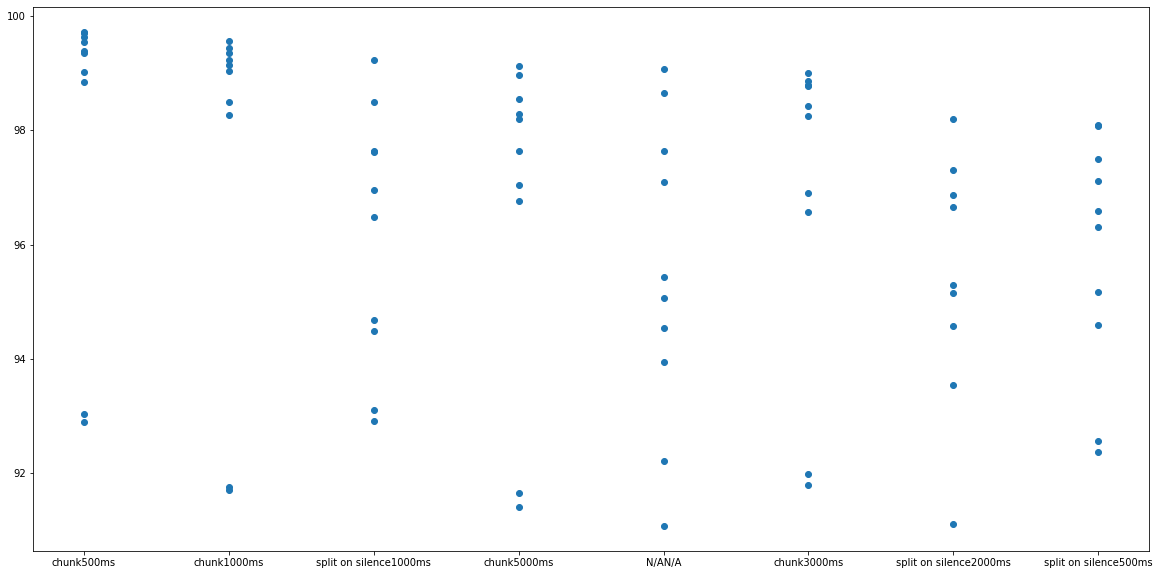

In [131]:
x = italian_df.feature_extraction_method.astype('string') + italian_df.dataset_variant.astype('string')
y = italian_df.accuracy

plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(x, y)

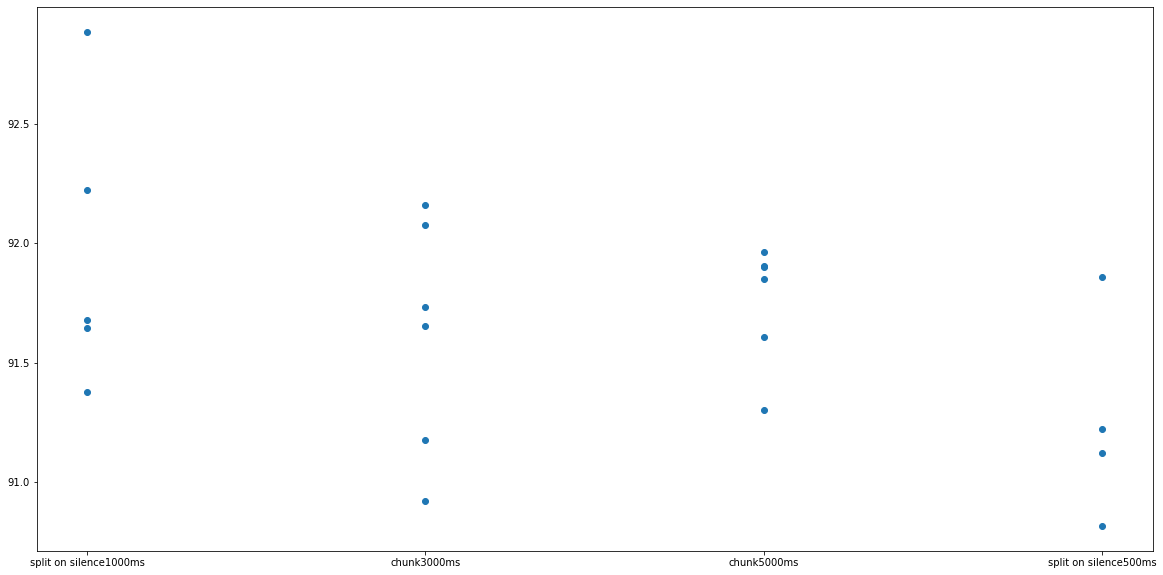

In [132]:
x = MDVR_df.feature_extraction_method.astype('string') + MDVR_df.dataset_variant.astype('string')
y = MDVR_df.accuracy

plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(x, y)


In [189]:
import altair as alt

MDVR_df2 = MDVR_df.copy()
MDVR_df2['Dataset'] = MDVR_df2.feature_extraction_method.astype('string') + " " + MDVR_df2.dataset_variant.astype('string')

alt.Chart(MDVR_df2).mark_circle().encode(
    alt.X('Dataset'),
    alt.Y('accuracy', scale=alt.Scale(domain=[90, 100])),
    size=alt.Size('accuracy:N', scale=None),
    color='model_name',
    tooltip=['F1-Score', 'accuracy', 'sensitivity', 'specificity',
       'recall', 'model_name', 'dataset', 'feature_extraction_method',
       'dataset_variant']
).properties(
    width=800,
    height=600,
    title="Accuracy for all datasets (MDVR-KCL)"
).interactive().display(renderer='svg')

alt.Chart(...)

In [191]:
italian_df2 = italian_df.copy()
italian_df2['Dataset'] = italian_df2.feature_extraction_method.astype('string') + " " + italian_df2.dataset_variant.astype('string')

alt.Chart(italian_df2).mark_circle().encode(
    alt.X('Dataset'),
    alt.Y('accuracy', scale=alt.Scale(domain=[80, 100])),
    size=alt.Size('accuracy:N', scale=None),
    color='model_name',
    tooltip=['F1-Score', 'accuracy', 'sensitivity', 'specificity',
       'recall', 'model_name', 'dataset', 'feature_extraction_method',
       'dataset_variant'],
).properties(
    width=800,
    height=600,
    title="Accuracy for all datasets (Italian Parkinson Speech)"
).interactive().display(renderer='svg')

alt.Chart(...)